[はじめてのニューラルネットワーク：分類問題の初歩  \|  TensorFlow Core](https://www.tensorflow.org/tutorials/keras/classification?hl=ja)

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


Fashion MNISTのデータ

[zalandoresearch/fashion-mnist: A MNIST-like fashion product database. Benchmark](https://github.com/zalandoresearch/fashion-mnist)

- 入力データ：画像は28×28のNumPy配列
- 教師データ：ラベル（label）は0から9で、衣料品のクラスに対応している

| Label	| Class
|---|---|
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
# 訓練用データには28x28の画像が60000枚ある
print(train_images.shape)
# 訓練用データにはラベルが60000個ある
print(len(train_labels))

(60000, 28, 28)
60000


### 画像の表示

In [5]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

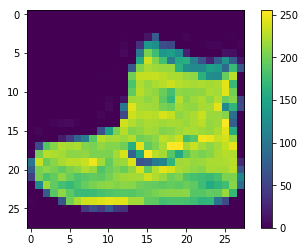

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### 正規化
0〜255 を 0〜1 に変換するために、画素の値を255で割る。

In [7]:
train_images = train_images / 255.0
test_images  = test_images / 255.0

訓練用データセットの最初の25枚の画像を、クラス名付きで表示する

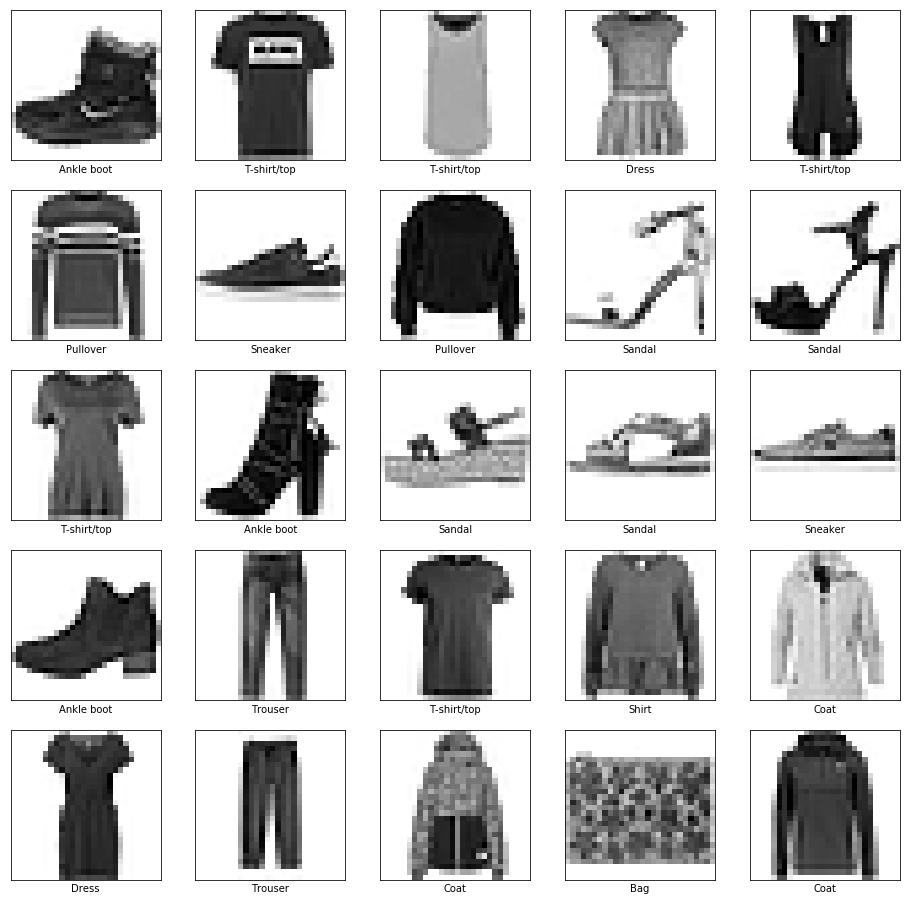

In [8]:
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### モデルの構築

- 入力層 : Flattenで28x28の2次元配列を1次元配列にする
- 中間層 : Denseで128個のノードを持つ層を作る
- 出力層 : Denseで10個のノードを持つsoftmax層を作る。これは合計が1になる10個の確率の配列を返す

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax') 
])

### モデルのコンパイル

- 損失関数 : この関数の値を最小化することで、訓練中のモデルを正しい方向に向かわせる
- 最適化手法 : モデルが見ているデータと、損失関数の値から、どのようにモデルを更新するかを決定する
- 指標 : 訓練とテストのステップを監視するのに使用する

In [10]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### モデルの訓練

画像とラベルの対応関係を学習する

In [11]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 92us/sample - loss: 0.4982 - accuracy: 0.8242
Epoch 2/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3732 - accuracy: 0.8655
Epoch 3/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3357 - accuracy: 0.8768
Epoch 4/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3118 - accuracy: 0.8868
Epoch 5/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2930 - accuracy: 0.8925


### 正解率の評価

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

10000/10000 - 1s - loss: 0.3426 - accuracy: 0.8772


### 予測

モデルを使って画像の分類予測をする

In [13]:
predictions = model.predict(test_images)

In [14]:
predictions[0]

array([1.0338122e-06, 5.8787998e-07, 4.1585579e-08, 1.6789673e-07,
       9.7294446e-07, 3.7994978e-03, 9.6392369e-06, 5.6907773e-02,
       1.8184723e-05, 9.3926221e-01], dtype=float32)

最も確率の高いラベルを出力する

In [15]:
np.argmax(predictions[0])

9

テスト用データのラベルを確認する

In [16]:
test_labels[0]

9

グラフ化

In [17]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

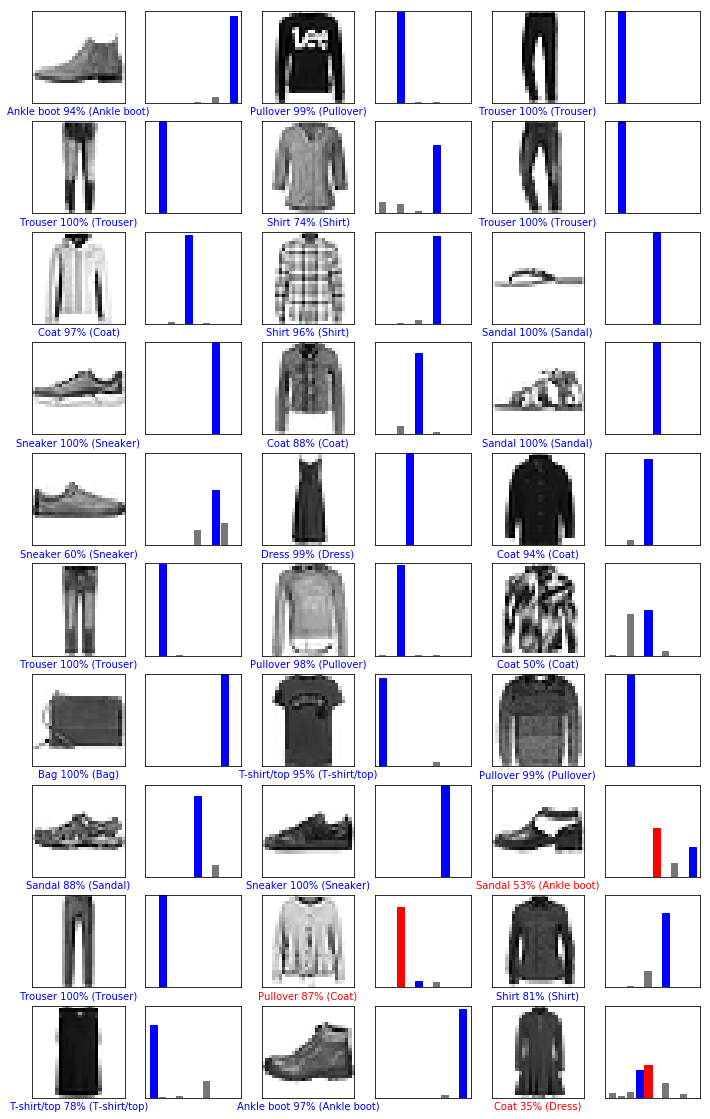

In [18]:
# X個のテスト画像、予測されたラベル、正解ラベルを表示します。
# 正しい予測は青で、間違った予測は赤で表示しています。
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

### 予測 (画像1枚)

In [19]:
img = np.array([test_images[0]])
print(img.shape)

(1, 28, 28)


In [20]:
predictions_single = model.predict(img)

print(np.argmax(predictions_single[0]))
print(np.argmax(predictions_single[0]) == test_labels[0])

9
True
